### Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Install requirements

In [2]:
!pip install pyod

### Import requirements

In [3]:
from pyod.models.iforest import IForest
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter
import torch
from torch import nn, optim
from torch.autograd import Variable
from torch.utils import data as data
import torchvision.transforms as transforms
import torchvision.datasets as datasets

### Load data

In [4]:
datapath = r'/content/drive/MyDrive/dogecoin/doge_usdt_4_1_5_18.csv'
dataset = pd.read_csv(datapath, header=None)

In [5]:
dataset.head()

,0,1,2,3,4,5,6,7
0,1617206400,0.053793,0.053549,0.053562,0.053789,223,6.125667e+05,32912.12767
1,1617206460,0.053830,0.053593,0.053792,0.053618,484,2.651230e+06,142430.65080
2,1617206520,0.053615,0.053520,0.053615,0.053560,399,1.408978e+06,75469.32434
3,1617206580,0.053637,0.053500,0.053536,0.053637,243,1.000480e+06,53576.25380
4,1617206640,0.053686,0.053567,0.053603,0.053646,241,1.534275e+06,82283.92655


### Features and labels

In [6]:
id_c = 0
high_c = 1
low_c = 2
open_c = 3
close_c = 4
count_c = 5
amount_c = 6
volume_c = 7

increase = 1
decrease = 0

time_series = 1

In [7]:
feature_dataset = dataset.drop(id_c, axis=1)

In [8]:
feature_dataset.head()

,1,2,3,4,5,6,7
0,0.053793,0.053549,0.053562,0.053789,223,6.125667e+05,32912.12767
1,0.053830,0.053593,0.053792,0.053618,484,2.651230e+06,142430.65080
2,0.053615,0.053520,0.053615,0.053560,399,1.408978e+06,75469.32434
3,0.053637,0.053500,0.053536,0.053637,243,1.000480e+06,53576.25380
4,0.053686,0.053567,0.053603,0.053646,241,1.534275e+06,82283.92655


In [9]:
# features = np.array(feature_dataset)
train_x = np.array(feature_dataset)

In [10]:
# print(features.shape)
print(train_x.shape)

(68487, 7)


### Train dataset and test dataset

In [11]:
# test_full_ratio = 0.2
# random_seed = 15

In [12]:
# train_x, test_x = train_test_split(features, test_size=test_full_ratio, random_state=random_seed)

In [13]:
# print(train_x.shape)
# print(test_x.shape)

### COPOD

In [14]:
clf = IForest()
clf.fit(train_x)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [15]:
y_train_pred = clf.labels_
y_train_scores = clf.decision_scores_
# y_test_scores = clf.decision_function(test_x)

In [16]:
print(y_train_pred)
print(y_train_scores)
# print(y_test_scores)

[0 0 0 ... 0 0 0]
[-0.06530274 -0.03406647 -0.04728841 ... -0.10194812 -0.11455898
 -0.1149536 ]


### Result

In [17]:
anomaly = []
for i in range(len(y_train_pred)):
  if y_train_pred[i] == 1:
    anomaly.append(i)

print(len(anomaly))
print(anomaly)

6849
[853, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1200, 1201, 1202, 1203, 1205, 1207, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1228, 1231, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1252, 1255, 1257, 1258, 1259, 1260, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1271, 1272, 1274, 1278, 1280, 1282, 1283, 1285, 1286, 1288, 1289, 1290, 1291, 1294, 1295, 1296, 1298, 1299, 1300, 1306, 1313, 1317, 1324, 1325, 1332, 1333,

### Plot

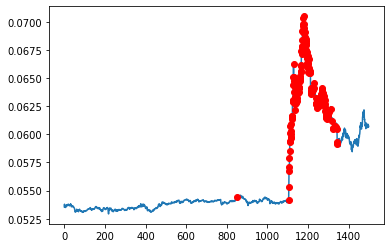

In [18]:
plt.plot(feature_dataset[3][0:1500])
for i in range(170):
  plt.plot(anomaly[i], feature_dataset[3][anomaly[i]], color='r', marker='o', linewidth=1)

### Anomaly dataset

In [19]:
anomaly_dataset = dataset.iloc[anomaly]
anomaly_dataset.head()

,0,1,2,3,4,5,6,7
853,1617257580,0.054423,0.054000,0.054403,0.054185,1792,9.260962e+06,501841.909
1105,1617272700,0.055550,0.054110,0.054171,0.055392,4203,2.329416e+07,1277014.825
1106,1617272760,0.057070,0.054940,0.055356,0.057056,17427,7.332755e+07,4107633.716
1107,1617272820,0.057388,0.056139,0.057056,0.056758,6958,3.753555e+07,2127935.964
1108,1617272880,0.058000,0.056705,0.056748,0.057877,9573,6.479132e+07,3721809.502


### Save dataset

In [20]:
# savepath = r'/content/drive/MyDrive/dogecoin/doge_usdt_4_1_5_18_anomaly.csv'
# anomaly_dataset.to_csv(savepath, index = False, header = False)

### Anomaly minutes dataset

In [21]:
time_long = time_series
feature_anomaly_list = []
label_anomaly_list = []
anomaly_period_start = 5
anomaly_period_end = 20

for i in range(len(anomaly)):
  anomaly_time = anomaly[i]

  # 1 - 15: 正常交易 16: 异常交易 取 1 - 15 做特征
  # feature_anomaly = feature_dataset.loc[anomaly_time - time_long:anomaly_time - 1]
  
  # 1 - 15: 正常交易 16: 异常交易 取 2 - 16 做特征
  feature_anomaly = feature_dataset.loc[anomaly_time - time_long + 1:anomaly_time]
  feature_anomaly = feature_anomaly.values
  feature_anomaly_list.append(feature_anomaly)

  # 1 - 15: 正常交易 16: 异常交易 取 16 做标签
  # label_anomaly = feature_dataset.loc[anomaly_time, close_c] - feature_dataset.loc[anomaly_time, open_c]
  
  # 1 - 15: 正常交易 16: 异常交易 取 17 做标签
  # next_time = anomaly_time + 1
  # label_anomaly = feature_dataset.loc[next_time, close_c] - feature_dataset.loc[next_time, open_c]

  # 1 - 15: 正常交易 16: 异常交易 取 21_close - 17_open 做标签
  period_start_time = anomaly_time + anomaly_period_start
  period_end_time = anomaly_time + anomaly_period_end
  label_anomaly = feature_dataset.loc[period_end_time, close_c] - feature_dataset.loc[period_start_time, open_c]

  if label_anomaly > 0:
    label_anomaly = increase
  else:
    label_anomaly = decrease
  label_anomaly_list.append(label_anomaly)

feature_anomaly_list = np.array(feature_anomaly_list)
label_anomaly_list = np.array(label_anomaly_list)

In [22]:
print(feature_anomaly_list.shape)
print(label_anomaly_list.shape)

(6849, 1, 7)
(6849,)


### Train dataset and test dataset

In [23]:
test_full_ratio = 0.2
random_seed = 15

In [24]:
train_x, test_x, train_y, test_y = train_test_split(feature_anomaly_list, label_anomaly_list, test_size=test_full_ratio, random_state=random_seed)

In [25]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(5479, 1, 7)
(5479,)
(1370, 1, 7)
(1370,)


### Data to torch

In [26]:
train_x = torch.from_numpy(train_x)
train_y = torch.from_numpy(train_y)

test_x = torch.from_numpy(test_x)
test_y = torch.from_numpy(test_y)

### Batch size

In [27]:
BATCH_SIZE = 128

torch_train_dataset = data.TensorDataset(train_x, train_y)
train_iterator = data.DataLoader(
  dataset = torch_train_dataset,
  batch_size = BATCH_SIZE
)

torch_test_dataset = data.TensorDataset(test_x, test_y)
test_iterator = data.DataLoader(
  dataset = torch_test_dataset,
  batch_size = BATCH_SIZE
)

### LSTM

In [28]:
class RNN_Model(nn.Module):
  def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
    super(RNN_Model, self).__init__()
    self.hidden_dim = hidden_dim
    self.layer_dim = layer_dim
    self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, nonlinearity='tanh')
    self.fc = nn.Linear(hidden_dim, output_dim)
      
  def forward(self, x):
    # (layer_dim, batch_size, hidden_dim)
    h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(device)
    out, hn = self.rnn(x, h0.detach())
    out = self.fc(out[:, -1, :])
    return out

### Init

In [29]:
input_dim = 7
hidden_dim = 512
layer_dim = 2
output_dim = 2

model = RNN_Model(input_dim, hidden_dim, layer_dim, output_dim)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

### Loss

In [30]:
criterion = nn.CrossEntropyLoss()

### Optimizer

In [31]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Train

In [32]:
sequence_dim = time_series
loss_list = []
accuracy_list = []
iteration_list = []

EPOCHS = 100
iter = 0
print_times = 50
for epoch in range(EPOCHS):
  for i, (fea, lab) in enumerate(train_iterator):
    model.train()
    fea = fea.view(-1, sequence_dim, input_dim).requires_grad_().float().to(device) 
    lab = lab.to(device)

    optimizer.zero_grad()
    outputs = model(fea)
    loss = criterion(outputs, lab)
    loss.backward()

    optimizer.step()
    iter += 1

    if iter % print_times == 0:
      model.eval()
      correct = 0.0
      total = 0.0

      for fea, lab in test_iterator:
        fea = fea.view(-1, sequence_dim, input_dim).float().to(device) 
        outputs = model(fea)
        predict = torch.max(outputs.data, 1)[1]
        total += lab.size(0)

        if torch.cuda.is_available():
          correct += (predict.gpu() == lab.gpu()).sum()
        else:
          correct += (predict == lab).sum()

      accuracy = correct / total * 100
      loss_list.append(loss.data)
      accuracy_list.append(accuracy)
      iteration_list.append(iter)

      print("loop : {}, Loss : {}, Accuracy : {}".format(iter, loss.item(), accuracy))

loop : 50, Loss : 0.689643383026123, Accuracy : 48.10219192504883
loop : 100, Loss : 0.6947405338287354, Accuracy : 54.8905143737793
loop : 150, Loss : 0.684303879737854, Accuracy : 54.52554702758789
loop : 200, Loss : 0.690809428691864, Accuracy : 53.868614196777344
loop : 250, Loss : 0.6892971396446228, Accuracy : 54.74452209472656
loop : 300, Loss : 0.6932116746902466, Accuracy : 48.61314010620117
loop : 350, Loss : 0.6857492923736572, Accuracy : 55.547447204589844
loop : 400, Loss : 0.6855371594429016, Accuracy : 48.4671516418457
loop : 450, Loss : 0.6809430718421936, Accuracy : 54.52554702758789
loop : 500, Loss : 0.6883642673492432, Accuracy : 54.45255661010742
loop : 550, Loss : 0.6895496249198914, Accuracy : 48.4671516418457
loop : 600, Loss : 0.6891499161720276, Accuracy : 54.37956619262695
loop : 650, Loss : 0.6739696264266968, Accuracy : 55.62043762207031
loop : 700, Loss : 0.6884347796440125, Accuracy : 55.547447204589844
loop : 750, Loss : 0.6932891607284546, Accuracy : 54

### Loss

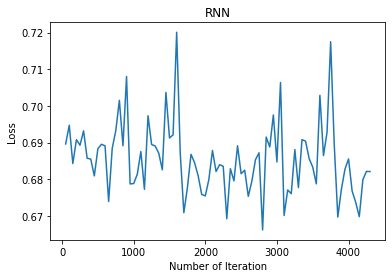

In [33]:
plt.plot(iteration_list, loss_list)
plt.xlabel('Number of Iteration')
plt.ylabel('Loss')
plt.title('RNN')
plt.show()

### Accuracy

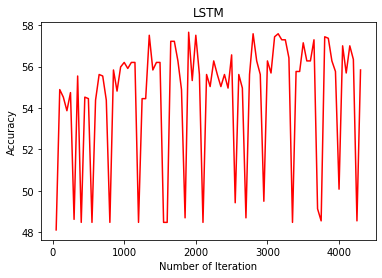

In [34]:
plt.plot(iteration_list, accuracy_list, color='r')
plt.xlabel('Number of Iteration')
plt.ylabel('Accuracy')
plt.title('LSTM')
plt.savefig('LSTM_mnist.png')
plt.show()